In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("airline_data.csv")

In [9]:
df.head(5)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [13]:
df["Month"]=pd.to_datetime(df["Month"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [15]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

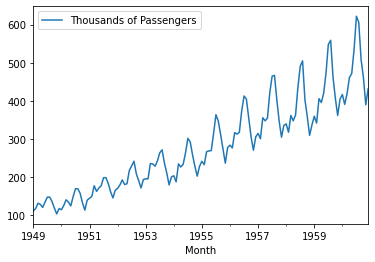

In [17]:
df.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [20]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060497
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
## Use Techniques Differencing
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)


In [22]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [31]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699963
p- value: 0.05421329028382592
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
df['Passengers second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)


In [33]:
adf_test(df['Passengers second Difference'].dropna())

ADF Statistics: -16.38423154246852
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [34]:
### 12 months 
## Use Techniques Differencing seasonal data so
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)


In [35]:
adf_test(df['Passengers 12 Difference'].dropna())


ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


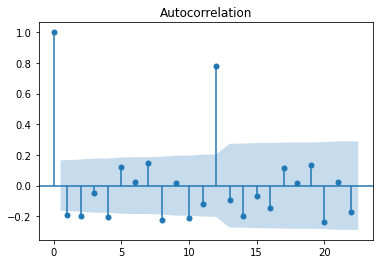

In [38]:
#pearson correlation 
#ACf we find q check how many ponts passing bounds there are total 13
acf = plot_acf(df["Passengers second Difference"].dropna())


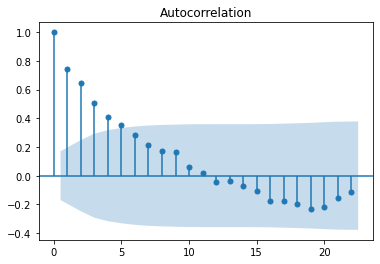

In [42]:
#q=5 because total 5 values are out of bound 
acf_12 = plot_acf(df["Passengers 12 Difference"].dropna())


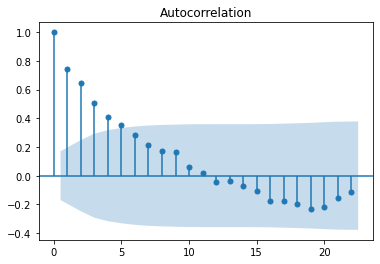

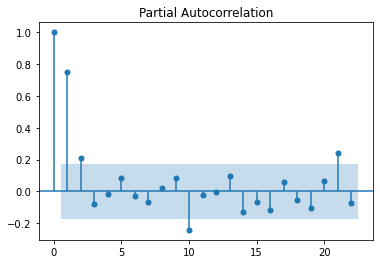

In [39]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


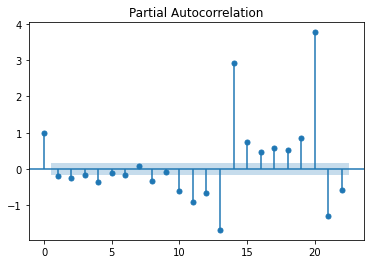

In [41]:
result = plot_pacf(df["Passengers second Difference"].dropna())


In [43]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)


In [44]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [45]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
train_data

,Thousands of Passengers,Passengers First Difference,Passengers second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [48]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [49]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Wed, 02 Mar 2022   AIC                            738.477
Time:                                06:55:20   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [50]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [51]:
residuals

Month
1956-01-01    302.695949
1956-02-01    289.830771
1956-03-01    319.329680
1956-04-01    328.562172
1956-05-01    298.689334
1956-06-01    354.352141
1956-07-01    426.271434
1956-08-01    441.529605
1956-09-01    350.001333
1956-10-01    315.913191
1956-11-01    242.711519
1956-12-01    281.647818
1957-01-01    333.119933
1957-02-01    304.741442
1957-03-01    367.652392
1957-04-01    343.198155
1957-05-01    343.325795
1957-06-01    413.019379
1957-07-01    483.932047
1957-08-01    477.557299
1957-09-01    403.265252
1957-10-01    346.226368
1957-11-01    281.802387
1957-12-01    337.112077
1958-01-01    347.244762
1958-02-01    325.413845
1958-03-01    364.318092
1958-04-01    341.830125
1958-05-01    355.290717
1958-06-01    435.056469
1958-07-01    504.184557
1958-08-01    505.771326
1958-09-01    405.976029
1958-10-01    350.193246
1958-11-01    301.548581
1958-12-01    341.117841
1959-01-01    364.677771
1959-02-01    347.031465
1959-03-01    403.339734
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

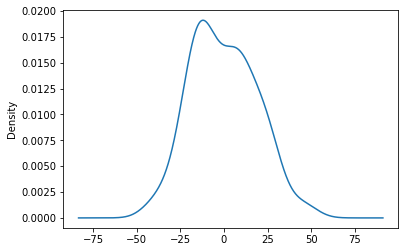

In [52]:
model_Arima_fit.resid.plot(kind='kde')

In [53]:
test_data['Predicted_ARIMA']=pred

C:\Users\sky\AppData\Local\Temp/ipykernel_5900/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

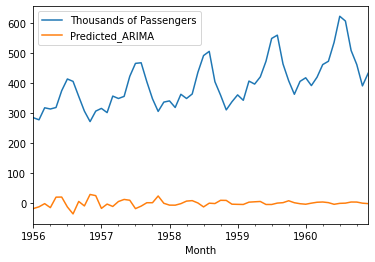

In [54]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [55]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [56]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [57]:
model_SARIMA_fit=model_SARIMA.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
model_SARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 02 Mar 2022   AIC                            548.481
Time:                                     07:07:23   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5977      0.937      0.638      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.583      0.000       0.376       1.286
ar.L3         -0.4519      0.894     -0.506      0.613      -2.203       1.299
ma.L1          0.1844      1.166      0.158      0.874      -2.101       2.470
ma.L2         -0.5336      1.264     -0.422      0.673      -3.011       1.944
ma.L3         -0.0987      0.385     -0.256      0.798      -0.853       0.656
ma.L4         -0.1274      0.339     -0.376      0.707      -0.791       0.536
ma.L5          0.2471      0.357      0.691      0.489      -0.453       0.947
sigma2        87.7351     81.451      1.077      0.281     -71.905     247.375
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [60]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

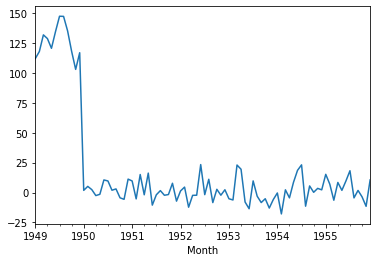

In [61]:
model_SARIMA_fit.resid.plot()


<AxesSubplot:ylabel='Density'>

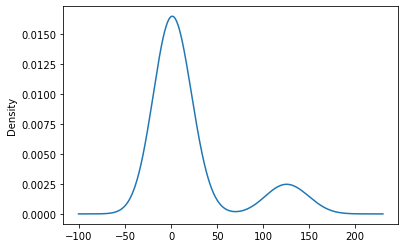

In [62]:
model_SARIMA_fit.resid.plot(kind='kde')


In [63]:
test_data['Predicted_SARIMA']=pred_Sarima


C:\Users\sky\AppData\Local\Temp/ipykernel_5900/2609187862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

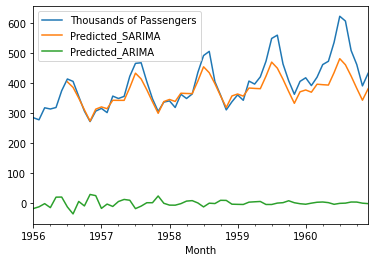

In [64]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
